In [47]:
import cv2
import sys
import numpy as np
from PIL import Image
import tools.infer.utility as utility
from PyPDF2 import PdfFileWriter, PdfReader
from tools.predict_det import TextDetector
from vietocr.tool.predictor import Predictor
# from vietocr.tool.config import Cfg
from utils import four_point_transform, margin_pst, read_json, draw_result
from config import Cfg
from pdf2image import convert_from_path
from process import process_image

In [16]:
#reinitialize arguments
sys.argv=['']
del sys
args, unknown = utility.init_args().parse_known_args()

In [18]:
# Load config
path_config = "config/config.json"
config = read_json(path_config)
path_model_detection = config["model_detection"]["path_model"]
config_model_recognition = config["model_recognition"]["config_model"]
config_model_base_recognition = config["model_recognition"]["config_model_base"]
path_model_recognition = config["model_recognition"]["path_model"]
path_font = config["font"]["path_font"]

# Load detection model
args.det_model_dir = path_model_detection
detect = TextDetector(args)

# Load recognition model
config_recognize_text = Cfg.load_config_from_file(config_model_recognition,
                                                  config_model_base_recognition)
config_recognize_text["weights"] = path_model_recognition
config_recognize_text["cnn"]["pretrained"] = False
config_recognize_text["device"] = "cpu"
config_recognize_text["predictor"]["beamsearch"] = False
recognize = Predictor(config_recognize_text)



In [45]:
def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

In [24]:
pdf_path = 'data/pdf/test.pdf'

In [28]:
input_pdf = PdfReader(pdf_path)

In [29]:
input_pdf

In [31]:
images = convert_from_path(pdf_path, poppler_path='./poppler-0.68.0/bin')

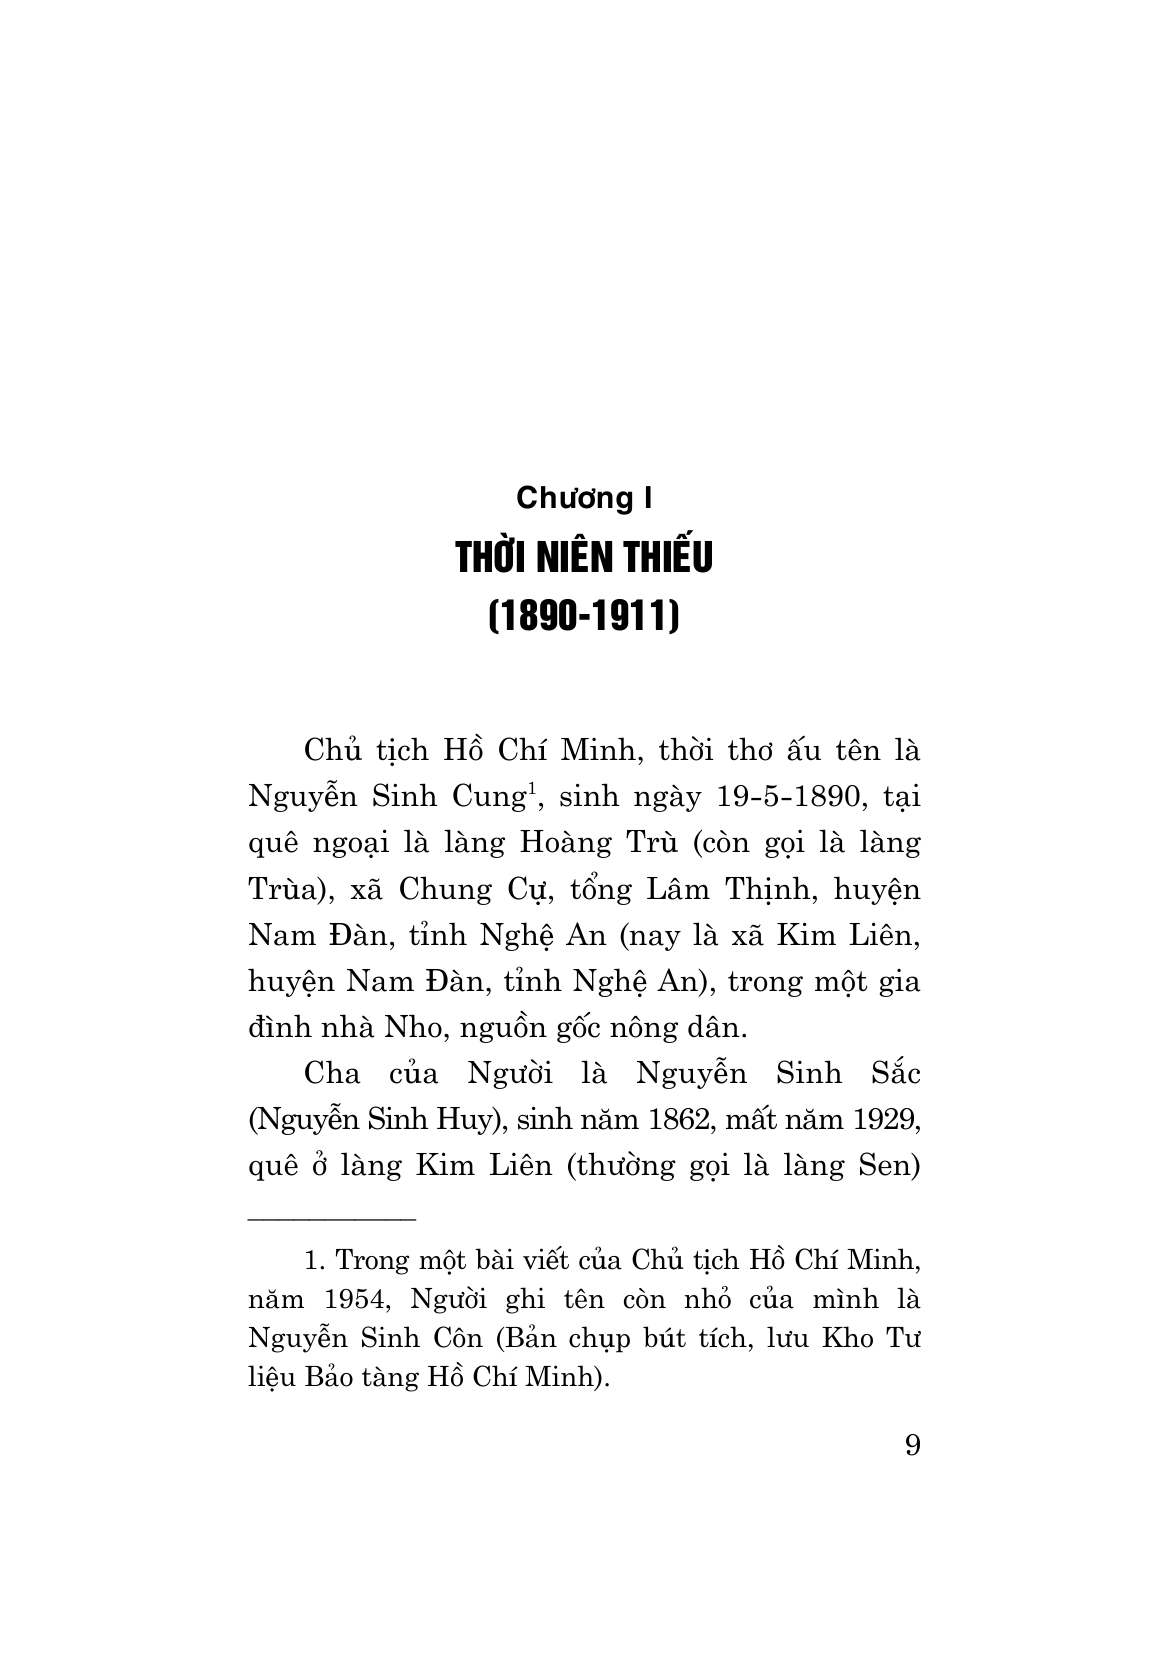

0.08463180810213089


In [52]:
for idx, image in enumerate(images):
    display(image)
    result_texts, result_boxes = process_image(image, detect, recognize)

In [50]:
result_texts

['Chương I',
 'THỜI NIÊN THIẾU',
 '(1890-1911)',
 'Chủ tịch Hồ Chí Minh, thời thơ ấu tên là',
 'Nguyễn Sinh Cungl, sinh ngày 19-5-1890, tại',
 'quê ngoại là làng hoàng trù (còn gọi là làng',
 'Trùa), xã chung cự, tổng lâm thịnh, huyện',
 'Nam Đàn, tỉnh nghệ An (nay là xã Kim Liên,',
 'huyện nam đàn, tỉnh nghệ an), trong một gia',
 'đình nhà nho, nguồn gốc nông dân',
 'Cha của Người là Nguyễn Sinh Sắc',
 '(Nguyễn Sinh Huy), sinh năm 1862, mất năm 1929,',
 'quê ở làng kim liên (thường gọi là làng Sen)',
 '1. Trong một bài viết của chủ tịch hồ chí minh,',
 'năm 1954, Người ghi tên còn nhỏ của mình là',
 'Nguyễn Sinh Côn (Bản chụp bút tích, lưu Kho Tư',
 'liệu bảo tàng hồ chí minh)',
 '9']

In [51]:
result_boxes

array([[[ 510.,  474.],
        [ 661.,  474.],
        [ 661.,  520.],
        [ 510.,  520.]],

       [[ 447.,  523.],
        [ 722.,  523.],
        [ 722.,  581.],
        [ 447.,  581.]],

       [[ 480.,  588.],
        [ 688.,  588.],
        [ 688.,  642.],
        [ 480.,  642.]],

       [[ 302.,  730.],
        [ 923.,  730.],
        [ 923.,  767.],
        [ 302.,  767.]],

       [[ 245.,  778.],
        [ 923.,  778.],
        [ 923.,  815.],
        [ 245.,  815.]],

       [[ 245.,  825.],
        [ 923.,  825.],
        [ 923.,  862.],
        [ 245.,  862.]],

       [[ 245.,  871.],
        [ 923.,  871.],
        [ 923.,  909.],
        [ 245.,  909.]],

       [[ 243.,  916.],
        [ 922.,  916.],
        [ 922.,  953.],
        [ 243.,  953.]],

       [[ 243.,  963.],
        [ 923.,  963.],
        [ 923., 1000.],
        [ 243., 1000.]],

       [[ 244., 1006.],
        [ 755., 1006.],
        [ 755., 1051.],
        [ 244., 1051.]],

       [[ 296., 1049